## <b>Happiness Model Training</b>

## Problem Statement:
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.


## Dataset: 
World Happiness Dataset of 2017


### Immersive Experience to be gained ?

There are various parameters happinees of a country depends. In this example we are using world happiness parameters and creating the model to predict happiness index of a country.

## Step 1: Import all the required libraries 
* __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
* __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
* __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
* __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [25]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import warnings
warnings.filterwarnings('ignore')


## Step 2 : Read all the required data
In this stage we are going to read our problem dataset and have a look on it.

In [2]:
#loading training data
try:
    data = pd.read_csv('Data/world-happiness_2017_trainig_dataset.csv')
    print('Data Reading done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data Reading done successfully...


In [3]:
print(data.head())

       Country  Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.  \
0       Norway                  1.616463  1.533524                  0.796667   
1      Denmark                  1.482383  1.551122                  0.792566   
2      Iceland                  1.480633  1.610574                  0.833552   
3  Switzerland                  1.564980  1.516912                  0.858131   
4      Finland                  1.443572  1.540247                  0.809158   

    Freedom  Generosity  Trust..Government.Corruption.  Dystopia.Residual  \
0  0.635423    0.362012                       0.315964           2.277027   
1  0.626007    0.355280                       0.400770           2.313707   
2  0.627163    0.475540                       0.153527           2.322715   
3  0.620071    0.290549                       0.367007           2.276716   
4  0.617951    0.245483                       0.382612           2.430182   

   Whisker.high  Whisker.low  Happiness.Score  
0      7

After we read the data, we can look at the data using:


In [4]:
#count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(data.shape[0],data.shape[1]))

The train data has 120 rows and 11 columns


## Step 3: Data Exploration


Let's proceed and check the distribution of the target variable.

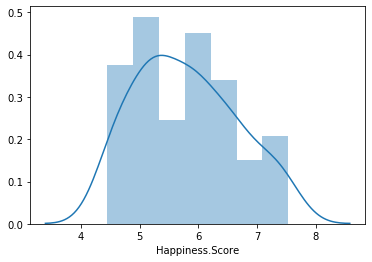

In [5]:
#Happiness Score
sns.distplot(data['Happiness.Score'])

We see that the target variable Happiness.Score has a no skewed distribution. This is not always our case for target varibale sometime it happens we have right or left skewed distribution. In that case we'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. In addition, linear algorithms assume constant variance in the error term. Alternatively, we can also confirm this skewed behavior using the skewness metric.

## Step 4: Data pre-processing


In this stage, we'll deal, encode variables from the dataset.

In [19]:
# Encoding Categorical Data
le = preprocessing.LabelEncoder()
  
data['Country']= le.fit_transform(data['Country']) 

X = data.iloc[:, :-1]
Y = data.iloc[:, 10]
Y= Y.values.reshape(Y.shape[0],1)

In [21]:
after_labelencoder = np.append(X, Y, axis=1)
np.savetxt("01_after_labelencoder.csv", after_labelencoder, delimiter=",")

In [22]:
# check the encoding categorical Data
print(data.head())

   Country  Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.  \
0       79                  1.616463  1.533524                  0.796667   
1       25                  1.482383  1.551122                  0.792566   
2       41                  1.480633  1.610574                  0.833552   
3      104                  1.564980  1.516912                  0.858131   
4       32                  1.443572  1.540247                  0.809158   

    Freedom  Generosity  Trust..Government.Corruption.  Dystopia.Residual  \
0  0.635423    0.362012                       0.315964           2.277027   
1  0.626007    0.355280                       0.400770           2.313707   
2  0.627163    0.475540                       0.153527           2.322715   
3  0.620071    0.290549                       0.367007           2.276716   
4  0.617951    0.245483                       0.382612           2.430182   

   Whisker.high  Whisker.low  Happiness.Score  
0      7.594445     7.479556    

## Step 5: Split the data into train and test set
- Now our data is ready to feed to the program. But here we'll split the data into train and test dataset so that after training the model we can test the model on the test dataset and find out how accurate are its predictions.
- Here we are splitting the data so that the training dataset contains 80% of the data and the test dataset contains 20% of the total data.
- Here we are using the train_test_split method from the sklearn library. We'll train our model on x_train and y_train, test it on x_test and y_test.

- test_size: Here we specify the size we want for our test dataset.
- random_state: When we use a random number generator for number or sequence generation, we give a starting number (AKA seed). When we provide the same seed, every time it’ll generate the same sequence as the first one. That’s why to keep the same random values every time, we give seed as random_state in train_test_split().

In [26]:
#split the dataset into x and y
x_data_train, x_data_test, y_data_train, y_data_test = sklearn.model_selection.train_test_split(
        X, Y, test_size=0.25,random_state=42)

We can't see the values of an entire matrix, but by looking at its shape, we decide if we going in the right direction or not. By using ".shape" we can see shape of a matrix and it will also helpful in debugging.

In [27]:
#display the shapes of the x and y train and test dataset.
print(x_data_train.shape, x_data_test.shape, y_data_train.shape, y_data_test.shape)

(90, 10) (30, 10) (90, 1) (30, 1)


## Step 6: Train the Model using Linear Regression

In [28]:
#Using sklearn linear regression model
model = sklearn.linear_model.LinearRegression()
model.fit(x_data_train, y_data_train)
print("Model trained successfully")

Model trained successfully


In [29]:
#using the test data to test the model
y_data_pred = model.predict(x_data_test)
y_data_pred = y_data_pred.reshape(len(y_data_pred),1)
type(y_data_pred), y_data_pred.shape

(numpy.ndarray, (30, 1))

In [30]:
#saving the y_pred_test_comparison in the csv file
y_pred_test_comparison = np.append(y_data_test, y_data_pred, axis=1)
np.savetxt("02_y_pred_test_comparison.csv", y_pred_test_comparison, delimiter=",")

In [31]:
diffs = y_data_test - y_data_pred
print(diffs)

[[-1.29674049e-13]
 [-6.21724894e-14]
 [-1.18127730e-13]
 [ 1.15463195e-14]
 [ 5.32907052e-15]
 [-1.53654867e-13]
 [-5.15143483e-14]
 [-6.30606678e-14]
 [-2.12274642e-13]
 [-7.54951657e-14]
 [ 1.93622895e-13]
 [ 8.34887715e-14]
 [-1.62536651e-13]
 [ 1.12798659e-13]
 [-1.89182003e-13]
 [-1.06581410e-14]
 [-2.13162821e-13]
 [ 5.77315973e-14]
 [ 9.68114477e-14]
 [-1.87405647e-13]
 [-1.19015908e-13]
 [ 8.70414851e-14]
 [ 1.72306613e-13]
 [-9.23705556e-14]
 [ 5.59552404e-14]
 [-2.28261854e-13]
 [-1.03916875e-13]
 [ 1.12798659e-13]
 [-1.56319402e-13]
 [-2.75335310e-14]]


In [32]:
#Score of the Linear Regression
print("Linear Regression:", model.score(x_data_test, y_data_test))
print(model)

Linear Regression: 1.0
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


## Step 7: Save the model in a pickle file

As Linear regression gave us the highest accuracy we'll go with it and save it to pickle file.
We save our model to pickle files so that when we want to perform predictions on unseen data, we don't have to train our model again. Any object in python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. 

In [33]:
# save the model to disk
with open('Model/world_happiness_prediction.pkl','wb') as f:
    pickle.dump(model,f)

## Summary 

Happiness data was divided in train and test set.Using the test set regression model has been devleoped and same has been tested using test set.